# Determination of Reaction Quantum Yields

## Table of Contents

* [Introduction](#Introduction)
* [Photodiode Responsivity](#Photodiode-Responsivity)
* [Loading of Data](#Loading-of-Data)
* [Spectrum of Known Photooxidation Products](#Spectrum-of-Known-Photooxidation-Products)
* [Initial Conditions for Photokinetic Model](#Initial-Conditions-for-Photokinetic-Model)
* [Fit Without any Additional Constraints](#Fit-Without-any-Additional-Constraints)
* [Dependence of Photoox. Quantum Yield on the Spectrum of Photooxidation Products](#Dependence-of-Photoox.-Quantum-Yield-on-the-Spectrum-of-Photooxidation-Products)
* [Addition of All Constraints](#Addition-of-All-Constraints)
* [Global Fit of All Combinations](#Global-Fit-of-All-Combinations)
* [Photostationary State (PSS)](#Photostationary-State-(PSS))


## Introduction
### Experimental Procedure and Data Acquisition

*Z*-**2** and *E*-**2** isomers (later in the text denoted as *Z* and *E* isomers) were dissolved in methanol. Then, a series of four experiments for each isomer and the corresponding LED light source were carried out. Two experiment were conducted at a higher concentration, whereas the other two at lower concentrations. For high concentration experiments, 2.50 mL of a stock solution of the corresponding isomer was pipetted into a clean and dry quartz cuvette (free from fingerprints, cleaned with acetone and dried with a stream of nitrogen or compressed air) equipped with a stir bar. For low concentration experiments, 2.00 mL of a stock solution of the corresponding isomer and, 1.00 mL of pure MeOH were pipetted into the cuvette. The cuvette was placed into the spectrometer equipped with a homemade 3D-printed irradiation setup (Figure S63) and irradiation was started. Time-dependent spectra were recorded for 5 min. Occasionally, the spectrum of a pure solvent was measured. The incident photon flux was determined with a calibrated photodiode as electric current and then recalculated to the molar spectral flux (see later). Current was recorded with the cuvette containing pure solvent placed in the setup. The thermal stability of *E* isomer ($\tau_{1/2} \approx 4$ days) was not an issue and, indeed, the spectra of *E* measured at different times during the day, in which all measurements were done, showed no sign of the formation of *Z* isomer. All spectra were measured with air as blank (no cuvette placed in the spectrometer). The resulting spectra in the folder were preprocessed by correction for a blank (the spectrum of a pure solvent was subtracted from all of the spectra), baseline correction (subtraction of the average from 600 to 700 nm from each spectrum), and by cropping the data to the range of 230 to 600 nm. These operation were done in advance, and the resulting data were saved as a matrix (time-explicit format) in text files. Each experiment folder contains the two files, `photon flux.txt` which contains the el. current in $\mu$A measured on photodiode and the corresponding text file which contains the spectral data. 


### Photokinetic Model

The general way of simulating and fitting of photokinetic data was described in our previous paper.<sup>[1](https://doi.org/10.1021/acs.joc.0c01673)</sup> In our case, apart from modeling of both isomers, we needed to add a third compartment to account for photooxidation (see main text). The system can be modeled by the following matrix differential equation, 

$$\frac{\mathrm d\mathbf c(t)}{\mathrm dt} = \frac{1}{V}\int\boldsymbol\Phi(\lambda)\mathbf I_m(\lambda, t)\,\mathrm d \lambda = \frac{l}{V}\boldsymbol\Phi\mathrm{diag}\left(\int I_{0,m}(\lambda, t)F(\lambda, t)\boldsymbol\varepsilon(\lambda)\,\mathrm d \lambda\right)\mathbf c(t)$$

where $\mathbf c(t)=\left(c_Z(t), c_E(t), c_{po}(t)\right)^{\mathrm T}$ is a column vector that contains actual concentrations of *Z* isomer, *E* isomer and photooxidation products, respectively, $\left([c_i] = \mathrm{mol\ L^{–1}}\right)$; $V$ ($[V] = \mathrm L$) is the total sample volume in a cuvette; and molar photon flux $\mathbf I_m(\lambda, t)=\left(I_{Z,m}(\lambda, t), I_{E,m}(\lambda, t), I_{po,m}(\lambda, t)\right)^{\mathrm T}$ $\left([I_{i,m}] = \mathrm{mol\ s^{–1}\ nm^{–1}}\right)$ is a column vector that contains the mols of photons absorbed by each compartment per unit time per nanometer. $\boldsymbol\Phi$ is a the transfer matrix that represents the photokinetic model. We used a simpler version of the analysis than that shown in our previous paper where we combined all experiments at different irradiation wavelengths and fitted all data at once.<sup>[1](https://doi.org/10.1021/acs.joc.0c01673)</sup> In this work, we used the pairs of experiments that were obtained with only one LED (see later), so we can factor our transfer matrix from the integral, because it does not depend on the irradiation wavelength. $I_{0,m}(\lambda, t) \left([I_{i,m}] = \mathrm{mol\ s^{–1}\ nm^{–1}}\right)$ is the incident molar spectral flux that hits the sample at time $t$,  $\boldsymbol\varepsilon(\lambda)=\left(\varepsilon_Z(\lambda), \varepsilon_E(\lambda), \varepsilon_{po}(\lambda)\right)^{\mathrm T}$ is a column vector that contains molar absorption coefficients of *Z* isomer, *E* isomer and photooxidation products, $\left([\varepsilon_i] = \mathrm{L\ mol^{–1}\ cm^{–1}}\right)$; and $l ([l] = \mathrm{cm})$ is a length of light path in the cuvette.

$$\boldsymbol\Phi = \begin{pmatrix}
-\Phi_{ZE} - \Phi_{ox} & \Phi_{EZ} & 0 \\
\Phi_{ZE} & -\Phi_{EZ} -\Phi_{ox} & 0 \\
\Phi_{ox} & \Phi_{ox} & 0
\end{pmatrix}$$

Finally $$F(\lambda, t) = \frac{1-10^{-A(\lambda, t)}}{A(\lambda, t)}$$ is a photokinetic factor with $A(\lambda, t) = l\sum_{i=0}^{k-1} c_i(t)\varepsilon_i(\lambda) =  l\mathbf c(t) \cdot \boldsymbol\varepsilon(\lambda)$ being absorbance of the solution at wavelength $\lambda$ and time $t$. Putting everything together, we get

$$\frac{\mathrm d}{\mathrm dt}\begin{pmatrix}
c_Z(t) \\
c_E(t) \\
c_{po}(t)
\end{pmatrix} = \frac{l}{V}\begin{pmatrix}
-\Phi_{ZE} - \Phi_{ox} & \Phi_{EZ} & 0 \\
\Phi_{ZE} & -\Phi_{EZ} -\Phi_{ox} & 0 \\
\Phi_{ox} & \Phi_{ox} & 0
\end{pmatrix} \begin{pmatrix}
\int I_{0,m}(\lambda, t)F(\lambda, t)\varepsilon_Z(\lambda)\,\mathrm d \lambda & 0 & 0 \\
0 & \int I_{0,m}(\lambda, t)F(\lambda, t)\varepsilon_E(\lambda)\,\mathrm d \lambda & 0 \\
0 & 0 & \int I_{0,m}(\lambda, t)F(\lambda, t)\varepsilon_{po}(\lambda)\,\mathrm d \lambda
\end{pmatrix}\begin{pmatrix}
c_Z(t) \\
c_E(t) \\
c_{po}(t)
\end{pmatrix}$$


### Handling Reflections

Not all light that hits the cuvette will get into the sample, because some of it will be reflected. Also, due to backreflection from the backside of the cuvette, reflected light leads to some additional absorption by the sample. These effects need to be included into the model. Let us denote $I_{LED,m}(\lambda)$ to be the incident molar spectral flux that hits the cuvette. Reflection happens mostly on the air-quartz interface (reflections from solvent-quartz interface can be neglected as their contributions is one order of magnitude lower).<sup>[2](https://doi.org/10.1039/C0PP00195C)</sup> The sample is therefore illuminated with $I_{LED,m}(\lambda)(1-R)$ intensity, where $R = 0.036$ is the reflectivity coefficient of quartz-air interface at $\lambda=443$ nm.<sup>[2](https://doi.org/10.1039/C0PP00195C)</sup> Note that the photon flux was determined with cuvette containing a pure solvent inside the setup, so this accounts for two reflections. Therefore, we denote the determined flux as $I_{solvent,m}(\lambda) = I_{LED,m}(\lambda)(1-R)^2$; this corresponds to cca 7% loss of light intensity, and it was experimentally verified. Also, the reflected light from the backside of the cuvette gets reabsorbed by the sample. The amount of the backreflection intensity depends on total absorbance of the solution and will be important at low absorbances of the sample. With this correction, the effective photon flux that hits the sample is $$I_{0,m}(\lambda, t) = I_{LED}(\lambda)(1-R)\left(1 + R10^{-A(\lambda, t)}\right)$$ Because the intensity behind the cuvette with a pure solvent was determined, the effective intensity was calculated as $$I_{0,m}(\lambda, t) = I_{solvent,m}(\lambda)\frac{1 + R10^{-A(\lambda, t)}}{1-R}$$ This correspond to expression from ref [2](https://doi.org/10.1039/C0PP00195C).


### Global Fitting

As follows from our previous paper,<sup>[1](https://doi.org/10.1021/acs.joc.0c01673)</sup> we used a similar routine, however, we used only two experiments (irradiation of *Z* (dataset $\mathbf D_Z$) and irradiation of *E* (dataset $\mathbf D_E$)) in the augmented dataset $\mathbf{D_{aug}}$ that we fitted at once. Also, because we acquired a sufficient amount of the data, we fitted all combinations of possible pairs and then averaged the results. As was stated in the beginning, we performed four experiments for each isomer per one LED. Therefore, we obtained 16 results by fitting of all combinations. In the case of 420 nm LED (see later), the one low concentration experiment from the *E* datasets needed to be removed due to a large error caused by a baseline alignment problem. However, a high concentration experiment of *Z* isomer was carried out. As a result, the combinations gave 5 * 3 = 15 of total results. All results for each LED were averaged, and the standard deviation was calculated. The same procedure but from all results was performed for the obtained molar absorption coefficients (matrix $\mathbf{\hat{S}}$) that were modeled as linear combinations of right singular vectors (columns of $\mathbf{V_r}$) obtained after truncated singular value decompositions (SVD) of an augmented dataset $\mathbf{D_{aug}}$. Note that rotational ambiguity<sup>[3](https://www.elsevier.com/books/resolving-spectral-mixtures/ruckebusch/978-0-444-63638-6)</sup> is not present in our model, because we use the pairs of both experiments, and therefore the spectra of both *Z* and *E* and quantum yields are unambiguously determined from the data.

$$\underbrace{\begin{pmatrix}
\mathbf D_Z \\
\mathbf D_E
\end{pmatrix}}_{\mathbf{D_{aug}}} = \underbrace{\begin{pmatrix}
\mathbf C_Z^{ode} \mathbf{(\Theta, \hat{S})} \\
\mathbf C_E^{ode} \mathbf{(\Theta, \hat{S})}
\end{pmatrix}}_{\mathbf{C_{aug}^{ode}(\Theta, \hat{S})}} \mathbf{\hat{S}^T} +  \underbrace{\begin{pmatrix}
\mathbf E_Z \\
\mathbf E_E
\end{pmatrix}}_{\mathbf{E_{aug}}}$$

$$\mathbf{D_{aug}} \approx \mathbf{U_r\Sigma_rV_r^T} $$

$$ \mathbf{\hat{S}^T} = \mathbf{TV_r^T}$$

The rows of individual datasets $\mathbf D_Z$ and $\mathbf D_E$ are the spectra recorded at different times in the experiment. The columns of $\mathbf C_i^{ode} \mathbf{(\Theta, \hat{S})}$ are the concentration profiles of individual compartments and it results from evaluation of the photokinetic model at experimental time points. It depends on the guessed molar absorption coefficients $\mathbf{\hat{S}}$, in which the columns of $\mathbf{\hat{S}}$ contain the $\varepsilon$ of individual compartments, and, on the unknown parameters $\mathbf\Theta$ which consists of the quantum yields and entries of the rotation matrix $\mathbf T$. The choice of the initial conditions for the photokinetic model will be discussed later. $\mathbf{E_{aug}}$ then represents the error unexplained by the fit.

$$\mathbf\Theta = \left(\Phi_{ZE}, \Phi_{EZ}, \Phi_{ox}, \mathrm{vec}(\mathbf T)\right)$$

We added some soft constraints to the residuals. Similarly to our previous work,<sup>[1](https://doi.org/10.1021/acs.joc.0c01673)</sup> we added the non-negativity constraint of spectra. Also, we added the constraint to the spectrum of photooxidation products, because there is a large correlation between the photooxidation quantum yield $\Phi_{ox}$ and the spectrum $\varepsilon_{po}$. It is because there are not enough data in the dataset and, also probably because photooxidation is non-specific and produces a mixture of different compounds. Therefore, we added a constraint of known shape of the spectrum of photooxidation products that we obtained from different experiment. The residual function is as follow:

$$\mathbf{R(\Theta)} = \begin{pmatrix}
\text{simulated data $-$ real data} \\
\text{non-negativity of spectra} \\
\text{known spectrum} 
\end{pmatrix} = \begin{pmatrix}
 \left(\mathbf{C_{aug}^{ode}} \mathbf{(\Theta, \hat{S})\hat{S}^T} - \mathbf{D_{aug}}\right) / \vert\vert \mathbf{D_{aug}} \vert\vert_2^2   \\
\alpha \mathbf{\hat{S}} \circ \left( \mathbf{\hat{S}} < 0 \right) / \vert\vert \mathbf{\hat{S}} \vert\vert_2^2\\
\beta \left(\mathbf{s}_{po, norm}^{known} - \mathbf{\hat{s}}_{po, norm}\right) / \vert\vert \mathbf{s}_{po, norm}^{known} \vert\vert_2^2 
\end{pmatrix}$$

Operator $\circ$ denotes the elementwise multiplication (Hadamard product). $\mathbf{s}_{po, norm}^{known}$ is the normalized known spectrum of photooxidation products and $\mathbf{\hat{s}}_{po, norm}$ is the normalized spectrum of photooxidation products from the fit (3<sup>rd</sup> column of $\mathbf{\hat{S}}$, but normalized to maximum). Note that we normalized the individual contributions (fitting residuals, non-negativity of spectra and known spectrum) by dividing each point with 2-norm of the corresponding matrix/vector. Also, the non-negativity and know spectrum contributions are weighted by the coefficients $\alpha$ and $\beta$, respectively, and they control the importance of this contribution during the fit. Magnitudes of these values will be discussed later. Finally, the non-linear least squares minimization of the residuals leads to finding the optimal parameters $\hat{\mathbf{\Theta}}$. For this, we used the [`scipy.optimize.least_squares`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html) routine (trust-region reflective algorithm). The fitting was performed with a user-friendly package [LMFIT](https://lmfit.github.io/lmfit-py/).

$$\hat{\mathbf{\Theta}} = \underset{\mathbf\Theta}{\text{arg min}} \vert\vert \mathbf{R(\Theta)} \vert\vert_2^2$$


### References

(1) Madea, D.; Mahvidi, S.; Chalupa, D.; Mujawar, T.; Dvořák, A.; Muchová, L.; Janoš, J.; Slavíček, P.; Švenda, J.; Vítek, L.; Klán, P. [Wavelength-Dependent Photochemistry and Biological Relevance of a Bilirubin Dipyrrinone Subunit](https://doi.org/10.1021/acs.joc.0c01673). *J. Org. Chem.* **2020**, *85*, 13015-13028.<br>
(2) Megerle, U.; Lechner, R.; Konig, B.; Riedle, E. [Laboratory apparatus for the accurate, facile and rapid determination of visible light photoreaction quantum yields](https://doi.org/10.1039/C0PP00195C). *Photochem. Photobiol. Sci.* **2010**, *9*, 1400.<br>
(3) Ruckebusch, C. [*Resolving Spectral Mixtures*](https://www.elsevier.com/books/resolving-spectral-mixtures/ruckebusch/978-0-444-63638-6). Elsevier **2016**. ISBN: 9780444636386 <br>

In [5]:
# general imports
from lib import *
import os

import pandas as pd
import numpy as np 
from numpy.linalg import svd, norm

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, AutoMinorLocator, MultipleLocator, FixedLocator

import scipy.constants as sc
from scipy.stats import linregress
from lmfit import Parameters, Minimizer

import warnings
warnings.filterwarnings("ignore")

from typing import Callable

## Emission Spectra of LEDs Used for Irradiation

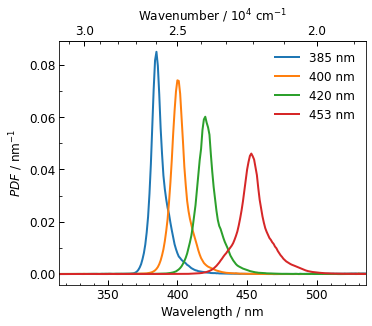

In [6]:
# define the global dir path, it is current directory at default
dir_path = './data'

LEDs_path = os.path.join(dir_path, 'LEDs norm.txt')
wavelengths, _, _leds = load_matrix(LEDs_path)

# spectra are normalized to maximum
# so lets normalize them to unit area
_leds /= np.trapz(_leds, axis=0)

# lets define the global indentifier for the LEDs, will be used later
LEDs_texts = ['385 nm', '400 nm', '420 nm', '453 nm']

# put them into dictionary for easy access
LEDs = {text: arr for text, arr in zip(LEDs_texts, _leds.T)}

# plot the spectra
fig, ax1 = plt.subplots(1, 1, figsize=(X_SIZE * 1.1, Y_SIZE))

# PDF = probablity density function
set_main_axis(ax1, y_label='$PDF$ / nm$^{-1}$', xlim=(315, 535),
              x_minor_locator=AutoMinorLocator(5), y_minor_locator=AutoMinorLocator(2))
_ = setup_wavenumber_axis(ax1, x_major_locator=FixedLocator([1.5, 2, 2.5, 3, 4]))

ax1.plot(wavelengths, _leds, lw=2)
ax1.legend(LEDs_texts, frameon=False)
# plt.savefig('irr_LEDs.png', dpi=500)
plt.show()

## Photodiode Responsivity

As was mentioned in the introduction, we determined the electric current that is related to incident photon flux. This quantity has to be calculated.

###  Calculation of Incident Photon Flux

The photodiode has different responsivity at different wavelengths and this responsivity $R(\lambda)$ was attached to the used photodiode; $[R(\lambda)]=\text{A W}^{-1}$, 
$$R(\lambda)=\frac{I}{P(\lambda)}$$

Here, $I$ is an electric current in Amperes and $P(\lambda)$ is radiant power (radiant flux) in Wats. Total molar photon flux $q_{0,m}$ is then calculated as follows (it is valid if only **monochromatic** light was used for irradiation); $[q_{0,m}] =  \text{mol s}^{-1}$:

$$q_{0,m}=\frac{P(\lambda)}{N_A E_{photon}(\lambda)}=\frac{P(\lambda) \lambda}{N_Ahc} = \frac{I \lambda}{N_Ahc R(\lambda)} = I \times q_{rel,m}(\lambda)$$

where $N_A$ is Avogadro's constant, $E_{photon} = hc / \lambda$ is energy of the photon, $h$ is Plank's constant and $c$ is the speed of light. The term $q_{rel,m}(\lambda) = \frac{\lambda}{N_Ahc R(\lambda)}$ will be used for further calculations. To get the molar photon flux if the broadband source (LED) was used, it needs to be integrated with the normalized (to unit area) emission spectrum of the LED used for irradiation. PDF stands for probability density function; $[PDF(\lambda)]=\text{nm}^{-1}$.

$$q_{0,m} = I \int q_{rel,m}(\lambda) PDF(\lambda)\mathrm d\lambda$$

To get the incident molar spectral flux ($I_{0,m}$) used for calculation, we just multiply it with the LED emission spectrum (normalized to unit area).

$$I_{0,m}(\lambda) = q_{0,m} PDF(\lambda)$$

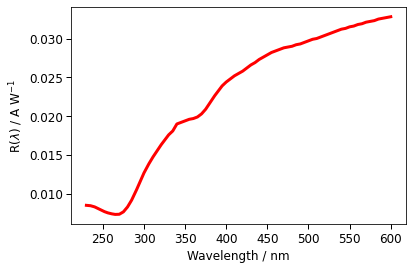

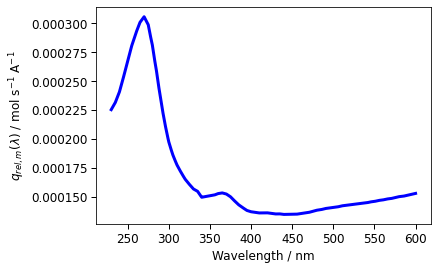

In [7]:
# load photodiode responsivity
_data_resp = np.genfromtxt(os.path.join(dir_path, 'Responsivity S120VC.txt'), delimiter='\t')
S120VC_R = _data_resp[1:, 1]  # photodiode responsivity
assert np.allclose(_data_resp[1:, 0], wavelengths)  # check both datasets use same wavelengths

# calculate q_rel
q_rel = wavelengths * 1e-9 / (sc.N_A * sc.h * sc.c * S120VC_R) # q_rel = lambda / (N_A * h * c * R)

# plot the responsivity
plt.plot(wavelengths, S120VC_R, 'r', lw=3)
plt.xlabel('Wavelength / nm')
plt.ylabel('R($\lambda$) / A W$^{-1}$')
plt.show()

# plot the q_rel
plt.plot(wavelengths, q_rel, 'b', lw=3)
plt.xlabel('Wavelength / nm')
plt.ylabel('$q_{rel,m}(\lambda)$ / mol s$^{-1}$ A$^{-1}$')
plt.show()

## Loading of Data

In the following cell, we define a function for loading two datasets for different experiments (`load_datasets`) and perform the calculation of the incident molar spectral flux according to previous text. The el. current for the experiments is written in a text file `photon flux.txt` and is located in the same folder. We plot all the kinetics that we are going to use for fitting.

### Factor Analysis

Then, there is a comparison of the singular values and right singular vectors of individual datasets (first two columns of plots) and combined (augmented) dataset (last column). It is evident, that there are 3 species resolved by the SVD factor analysis in the individual datasets. That is because we have *Z*, *E* isomers and photooxidation products. However, the combined dataset shows 4 components. This is due to misaligned baselines for two datasets. Even though the experiments were performed with the same conditions and as precisely as possible, minor differences always occur. This results in a slightly different baselines for two distinct experiments and it leads to the observation of an extra factor.

As was mentioned in the introduction, the spectra during fitting will be modeled as a linear combination of the right singular vectors of the augmented dataset. The coefficients are stored in the rotation matrix $\mathbf T$.

$$ \mathbf{\hat{S}^T} = \mathbf{TV_r^T}$$

From this observation, we can decide the dimensions of $\mathbf T$. The first 5 singular vectors of augmanted dataset display some signal (actually 4 would be enough as the 5<sup>th</sup> has a very low singular value, but just in case, we use the extra one), the rest is structured noise, so the obvious way would be to use the first 5 vectors, therefore the dimension of $\mathbf T$ will be $3\times 5$ (three rows and five columns). Later in code, these numbers are denoted as $N=3$ and $M=5$.

$$\mathbf T = \begin{pmatrix}
t_{11} & t_{12} & t_{13} & t_{14} & t_{15} \\
t_{21} & t_{22} & t_{23} & t_{24} & t_{25} \\
t_{31} & t_{32} & t_{33} & t_{34} & t_{35}
\end{pmatrix} = \begin{pmatrix}
\rule[.5ex]{2.5ex}{0.5pt} & \mathbf t_Z & \rule[.5ex]{2.5ex}{0.5pt} \\
\rule[.5ex]{2.5ex}{0.5pt} & \mathbf t_E & \rule[.5ex]{2.5ex}{0.5pt} \\
\rule[.5ex]{2.5ex}{0.5pt} & \mathbf t_{po} & \rule[.5ex]{2.5ex}{0.5pt}
\end{pmatrix}$$



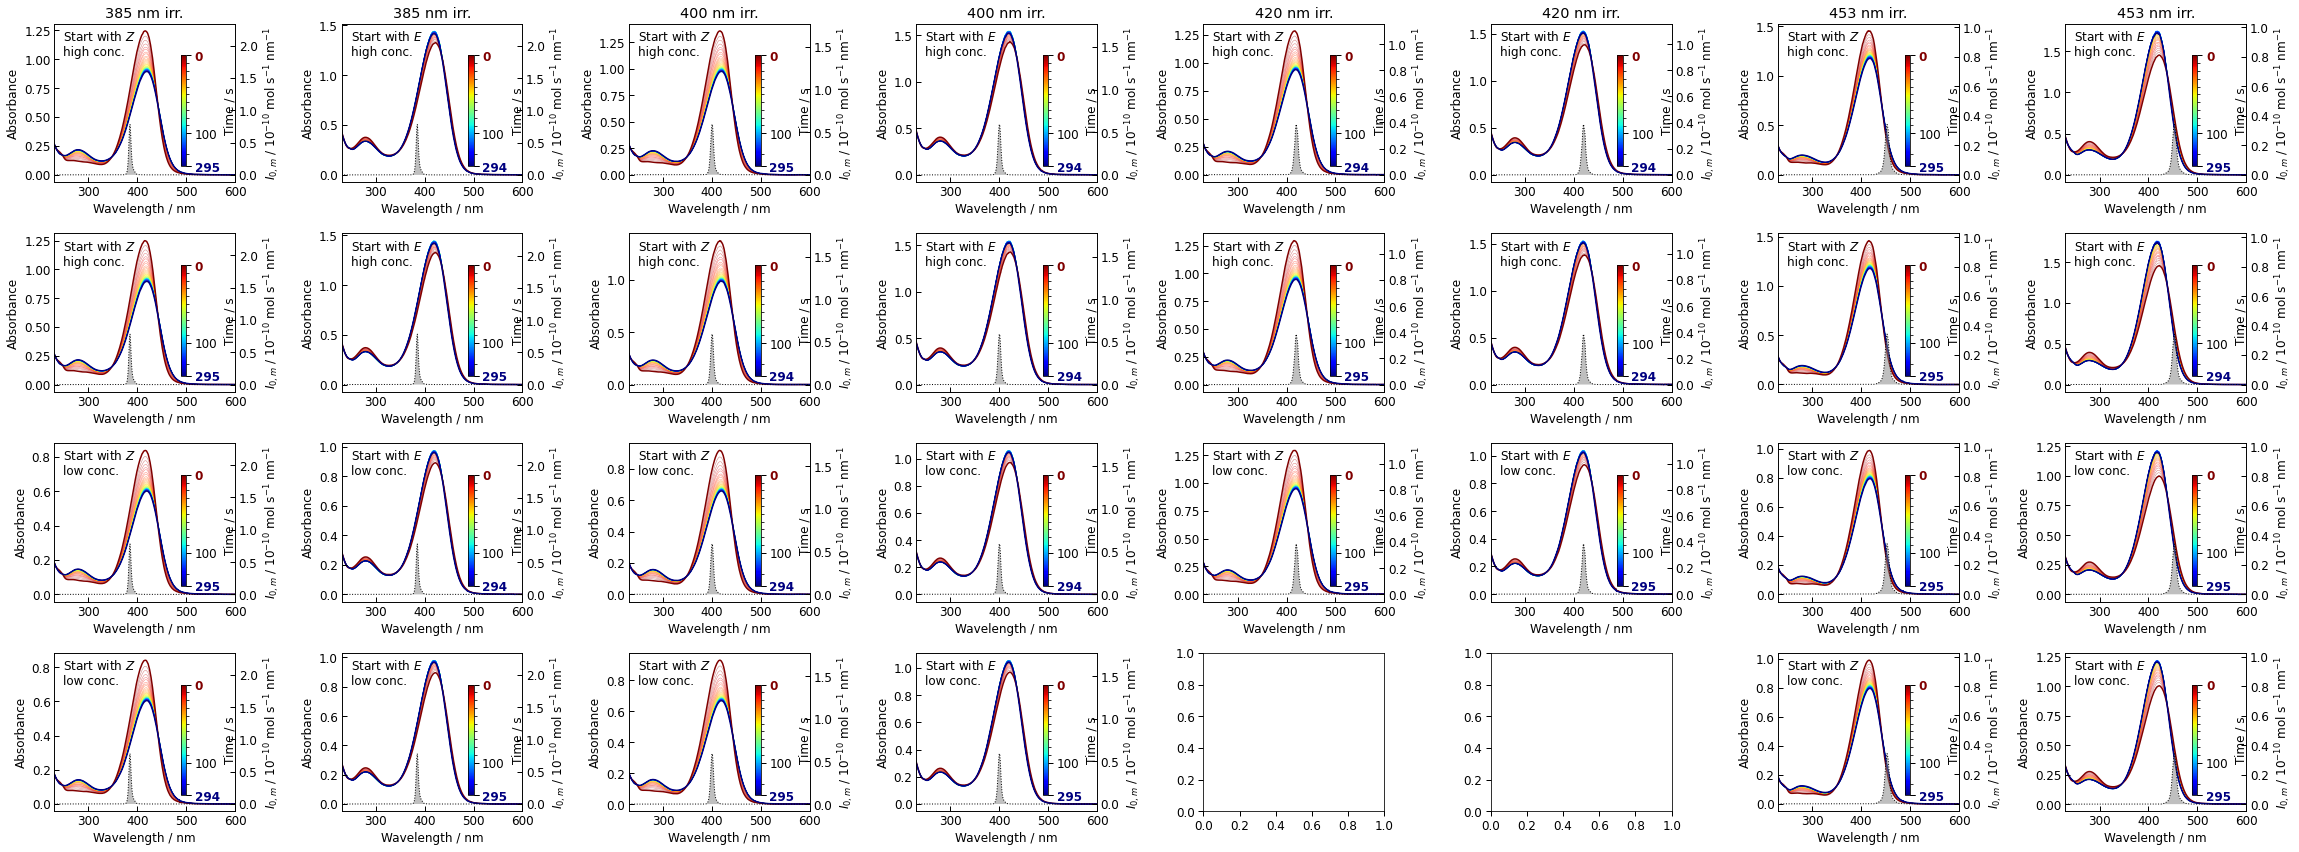

In [8]:
# define the names of the directories for individual experiments
# directories for 420 nm LED experiments are different
Z_exps = ['2Z high conc 01', '2Z high conc 02', '2Z low conc 01', '2Z low conc 02']
Z_exps_420 = ['2Z high conc 01', '2Z high conc 02', '2Z high conc 03', '2Z low conc 01', '2Z low conc 02']
E_exps = ['2E high conc 01', '2E high conc 02', '2E low conc 01', '2E low conc 02']
E_exps_420 = ['2E high conc 01', '2E high conc 02', '2E low conc 01']

def load_datasets(Zexp: str, Eexp: str, irr_LED: str = '385 nm') -> tuple:
    """
    Loads the Z and E datasets. Also loads the photodiode current and calcualtes the spectral moalar flux and SVD
    of the augmented datasets. Returns the tuple of parameters.
    
    Parameters
    ----------
    Zexp : str
        Name of the Z experiment as is saved in the folder.
    Eexp : str
        Name of the E experiment as is saved in the folder.
    irr_LED : str
        LED used for irradiation. Default '385 nm'.
        
    Returns
    -------
    D_aug : np.ndarray
        Augmented matrix of both datasets.
    DZ : np.ndarray
        Dataset from Z experiment.
    DE : np.ndarray
        Dataset from E experiment.
    wlsZ : np.ndarray
        Array of wavelengths, wavelengths are same for both Z and E datasets.
    timesZ : np.ndarray
        Array of time points for Z experiment.
    timesE : np.ndarray
        Array of time points for E experiment.
    I0_m_Z : np.ndarray
        Incident molar spectral flux for Z experiment.
    I0_m_E : np.ndarray
        Incident molar spectral flux for E experiment.
    U : np.ndarray
        Left singular vectors of augmented dataset.
    S : np.ndarray
        Singular numbers of augmented datastet.
    VT : np.ndarray
        Right singular vectors of augmented dataset.

    """
    wlsZ, timesZ, DZ = load_matrix(os.path.join(dir_path, irr_LED, Zexp, f'{Zexp}.txt'))
    wlsE, timesE, DE = load_matrix(os.path.join(dir_path, irr_LED, Eexp, f'{Eexp}.txt'))
    
    # transpose the matrices to time-explicit format, the rows now contain the spectra at particular times
    # and columns contain traces at particular wavelengths
    DZ = DZ.T
    DE = DE.T
    
    # check the wavelengths are the same for both datasets
    assert np.allclose(wlsZ, wlsE)
    
    # load el. current in uA
    I_Z = load_LED_current(os.path.join(dir_path, irr_LED, Zexp, 'photon flux.txt'))
    I_E = load_LED_current(os.path.join(dir_path, irr_LED, Eexp, 'photon flux.txt'))
    
    # convert to Ampere
    I_Z *= 1e-6
    I_E *= 1e-6
    
    # calculate incident molar spectral flux, I0_m = I * integral(q_rel * PDF) * PDF
    # the wavelength spacing is 1 nm, so dx = 1 (default value for trapz)
    rel_sp_flux = np.trapz(q_rel * LEDs[irr_LED]) * LEDs[irr_LED]  # integral(q_rel * PDF) * PDF
    
    I0_m_Z = I_Z * rel_sp_flux  
    I0_m_E = I_E * rel_sp_flux
    
    # combine datasets verically, each row of the matrix contains the recorded spectra
    D_aug = np.vstack((DZ, DE))

    # calculate svd
    U, S, VT = svd(D_aug, full_matrices=False)
    
    return D_aug, DZ, DE, wlsZ, timesZ, timesE, I0_m_Z, I0_m_E, U, S, VT

# plot kinetics of all experiments
fig, axes = plt.subplots(4, 2 * 4, figsize=(2*4 * 4, 4 * 3))

for i, led in enumerate(LEDs_texts):
    
    f_axes = axes[:, 2*i:2*(i+1)].flatten()

    # for led in LEDs_texts:
    _Z_exps = Z_exps_420[:3] if led == '420 nm' else Z_exps
    _E_exps = E_exps_420 if led == '420 nm' else E_exps
    
    f = 1e-10
    lbl = f'$I_{{0,m}}$ / $10^{{{int(np.log10(f))}}}$ mol s$^{{-1}}$ nm$^{{-1}}$'

    for j in range(len(_Z_exps)):
        _, DZ, DE, wavelengths, timesZ, timesE, I0_m_Z, I0_m_E, *_ = load_datasets(_Z_exps[j], _E_exps[j], irr_LED=led)
        loc = 0.5 if i < 2 else 0.2
        plot_kinetics_ax(f_axes[2*j], DZ, timesZ, wavelengths, add_wn_axis=False, major_ticks_labels=(100,), emph_t=(0, timesZ[-1]), colorbar_xy_loc=(0.7,0.1), LED_source_xy=(wavelengths, I0_m_Z * LEDs[led]  / f), sec_axis_ylabel=lbl, sec_axis_y_major_locator=MultipleLocator(loc))
        plot_kinetics_ax(f_axes[2*j + 1], DE, timesE, wavelengths, add_wn_axis=False, major_ticks_labels=(100,), emph_t=(0, timesE[-1]), colorbar_xy_loc=(0.7,0.1), LED_source_xy=(wavelengths, I0_m_E * LEDs[led]  / f), sec_axis_ylabel=lbl, sec_axis_y_major_locator=MultipleLocator(loc))
        conc_label = 'high conc.' if j < 2 else 'low conc.'
        f_axes[2*j].text(0.05, 0.8, f'Start with $Z$\n{conc_label}', transform=f_axes[2*j].transAxes)
        f_axes[2*j + 1].text(0.05, 0.8, f'Start with $E$\n{conc_label}', transform=f_axes[2*j+1].transAxes)
        f_axes[0].set_title(f'{led} irr.')
        f_axes[1].set_title(f'{led} irr.')
        
plt.tight_layout()
plt.show()

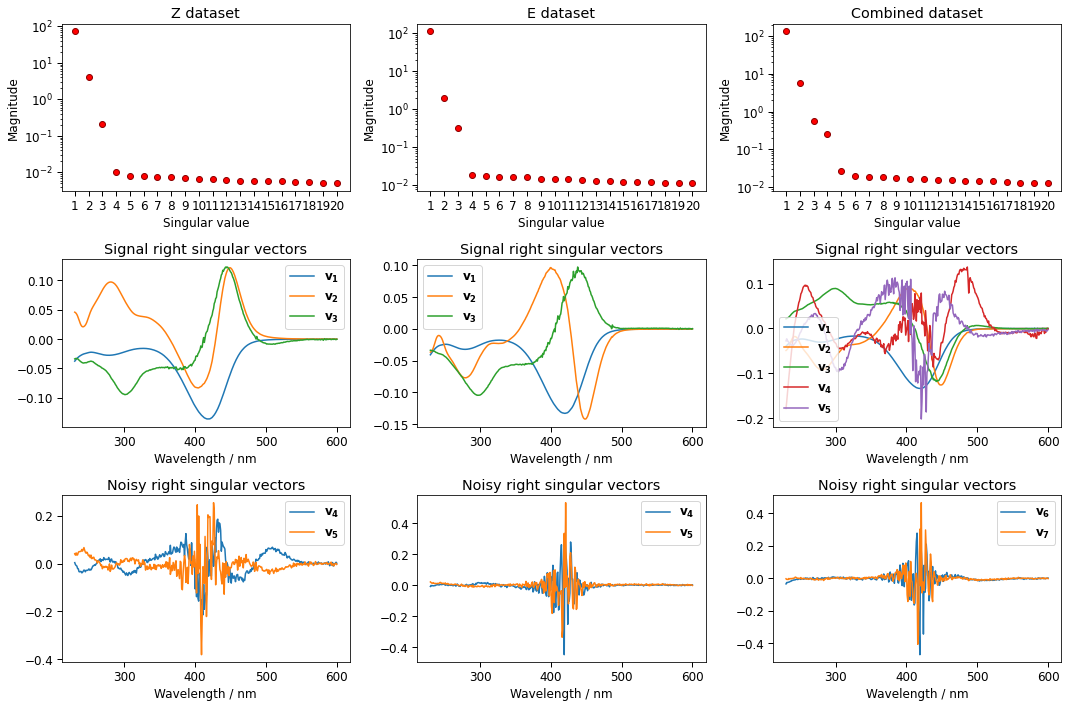

In [9]:
# load datasets for first Z and E experiments irradiated with 385 nm LED 
_, DZ, DE, wavelengths, timesZ, timesE, I0_m_Z, I0_m_E, _, S_aug, VT_aug = load_datasets(Z_exps[0], E_exps[0], irr_LED='385 nm')

# calculate the SVDs of individual datasets
U_Z, S_Z, VT_Z = svd(DZ, full_matrices=False)
U_E, S_E, VT_E = svd(DE, full_matrices=False)

fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# plot first 20 singular values of both datasets and combined dataset
for i, (Si, title) in enumerate(zip([S_Z, S_E, S_aug], ['Z dataset', 'E dataset', 'Combined dataset'])):
    axes[0, i].scatter(np.arange(1, 21), Si[:20], color='r', edgecolors='darkred')
    axes[0, i].set_yscale('log')
    axes[0, i].set_xlabel('Singular value')
    axes[0, i].set_xticks(np.arange(1, 21))
    axes[0, i].set_ylabel('Magnitude')
    axes[0, i].set_title(title)

vectors = [3, 3, 5]
# plot the signal right singular vectors
for i, (VTi, n) in enumerate(zip([VT_Z, VT_E, VT_aug], vectors)):
    axes[1, i].plot(wavelengths, VTi[:n].T)
    axes[1, i].set_xlabel('Wavelength / nm')
    axes[1, i].legend([f'$\\bf v_{i+1}$' for i in range(n)], frameon=True)
    axes[1, i].set_title('Signal right singular vectors')
    
    
# plot the last two noisy singular vectors
for i, (VTi, n) in enumerate(zip([VT_Z, VT_E, VT_aug], vectors)):
    axes[2, i].plot(wavelengths, VTi[n:n+2].T)
    axes[2, i].set_xlabel('Wavelength / nm')
    axes[2, i].legend([f'$\\bf v_{i+1}$' for i in range(n, n+2)], frameon=True)
    axes[2, i].set_title('Noisy right singular vectors')

plt.tight_layout()
plt.show()

## Spectrum of Known Photooxidation Products

This is the spectrum from irradiation of *Z* under oxygen with 443 nm LED. The spectrum is taken at $t = 350\ \mathrm s$. The spectrum will be used in fitting, in the residual function.

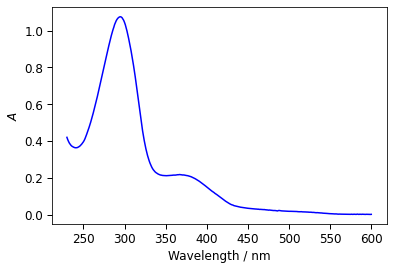

In [10]:
# load irradiation under O2 data
_wls, _times, _D = load_matrix(os.path.join(dir_path, 'irr_under_O2_data.txt'))
# crop to 230 - 600 nm window
_wls = _wls[:-50]
_D = _D[:-50]

# pick spectrum at time 350 s
idx = fi(_times, 350)

photoox_products = _D[:, idx]
plt.plot(_wls, photoox_products, 'b')
plt.xlabel('Wavelength / nm')
plt.ylabel('$A$')
plt.show()

## Initial Conditions for Photokinetic Model
### Initialization of the Spectra  

Because we know the $\varepsilon_Z$, we could use this known spectrum to fix the spectrum of *Z* in matrix $\mathbf{\hat{S}}$, or better, to fix parameters $\mathbf t_Z = (t_1\dots t_5)$ (first row of $\mathbf{T}$) which describe the spectrum of *Z*. Instead of using an externally determined spectrum of *Z*, we always used the spectrum of *Z* in a particular experiment pair that is being fitted, because the baseline alignment effects cause slight changes in the spectra, especially in the UV region. So, to find the right parameters $\mathbf t_Z$, we first scaled the normalized initial spectrum from *Z* experiment (at 415 nm) by its $\varepsilon_Z(415 nm) = 39033\  \mathrm{M^{-1} cm^{-1}}$, which was determined from the concentration dependence. Then, the parameters are calculated by projection of scaled spectrum onto the orthogonal basis of right singular vectors.

$$\mathbf t_Z = \varepsilon_Z(415 nm) A_Z^{norm. at\ 415}(t=0)\times\mathbf{V_r}$$

In this way, we can fix the parameters $\mathbf t_Z$ in matrix $\mathbf T$, so in other words, we are fixing the spectrum of *Z*, but this fixed spectrum is slighlty different for each experiment pair. The same procedure is done for the spectrum of *E*, but the normalized spectrum from *E* experiment is used. This time, the coefficients are allowed to vary as this is only the rough estimate of *E* spectrum. The coefficients for the spectrum of photooxidation products were just instantiated to be the scaling factor $\varepsilon_Z(415 nm) / A_Z(t=0, 415nm)$ and entries were allowed to vary as well.

### Calculation of Initial Concentrations

Integration of a photokinetic model requires the initial concentrations for all isomers as the initial conditions for the set of ordinary differential equations (ODEs). The initial concentration of the photooxidation products will always be zero, but the initial concentrations of *Z* and *E* isomers had to be calculated. For calculation, we used the corresponding spectra. Typically, the concentration can be estimated at single wavelength, but we used all the spectra here. 

$$\hat{c} = \underset{c}{\text{arg min}} \vert\vert \mathbf a - lc \mathbf{\hat{s}_{avrg}} \vert\vert_2^2$$

Here the $\mathbf a$ is the spectrum (row vector) of sample at $t=0$ with unknown concentration $c$ and $\mathbf{\hat{s}_{avrg}}$ is the averaged molar absorption coefficient that is obtained by weighting esimated molar absorption coefficients $\mathbf{\hat{S}}$ with known populations $\mathbf p$ (row vector) of species in the sample. $l=1\ \mathrm{cm}$ is the path of light traveled.

$$\mathbf{\hat{s}_{avrg}} = \mathbf p \times \mathbf{\hat{S}^T}$$

The least squares solution is $$\hat{c} = \frac{\sum a_i\hat{s}_{i, avrg}}{\sum \hat{s}_{i, avrg}^2}$$

The individual concentrations of species are then $\hat{c} \mathbf p$. These calculations are handled by a function `get_conc_vector`. In the case of the *E* isomer, it was not able to prepare it pure, so by HPLC, it was found that for these measurements, it contained 23.4 mol % of the *Z* isomer. This information was included into the calculation.

In the following cell, there are two functions, `simulate_pair` and `fit_pair` which are sufficiently explained by the code comments.


In [11]:
# so we will search the spectra as the linear combination of first 5 right singular vectors, 
# that should be sufficient, others are just structured noise components

N, M = 3, 5  # number of species, number of right singular vectors used to approximate the spectra
eps_Z_at_415 = 39033 # M-1 cm-1  

def get_conc_vector(spectrum: np.ndarray, populations: np.ndarray, ST: np.ndarray) -> np.ndarray:
    """
    Estimates the individual concentrations of species based on the known population of them
    in the mixture, known molar abs. coefficients and absorption spectrum of their mixture.
    Estimation is performed using the least squares method.
    
    Parameters
    ----------
    spectrum : np.ndarray
        Absorption spectrum of the mixture.
    populations : np.ndarray
        Vector of populations of the species.
    ST : np.ndarray
        Matrix containing the molar abs. coefficients of the pure species.
        The number of rows must match number of entries in population vector.
    """
    pop = np.asarray(populations, dtype=np.float64)
    pop /= pop.sum()
    assert pop.shape[0] == ST.shape[0]

    ST_avrg = pop.dot(ST)  # calculate the weighted average of epsilons

    STST_sum = (ST_avrg * ST_avrg).sum()

    c0 = (spectrum * ST_avrg).sum() / STST_sum

    return pop * c0  # scale the populations by the overall concentration 

def simulate_pair(params: Parameters, VT: np.ndarray, VZ: float, VE: float,
                  I0_m_Z: np.ndarray, I0_m_E: np.ndarray, DZ: np.ndarray, DE: np.ndarray, 
                  timesZ: np.ndarray, timesE: np.ndarray) -> tuple:
    """
    Simulates the both Z and E experiments with the current parameters by photokinetics model
    and constructs the augmented fitted matrix
    
    Parameters
    ----------
    params : Parameters
        Parameters to simulate pair.
    VT : np.ndarray
        Right singular vectors of augmented dataset.
    VZ: float
        Volume of Z experiment in L.
    VE: float
        Volume of E experiment in L.
    I0_m_Z : np.ndarray
        Incident molar spectral flux for Z experiment.
    I0_m_E : np.ndarray
        Incident molar spectral flux for E experiment.
    DZ : np.ndarray
        Dataset from Z experiment.
    DE : np.ndarray
        Dataset from E experiment.
    timesZ : np.ndarray
        Array of time points for Z experiment.
    timesE : np.ndarray
        Array of time points for E experiment.
        
    Returns
    -------
    D_fit : np.ndarray
        Simulated augmented matrix.
    ST_est : np.ndarray
        Matrix of estimated molar absorption coefficients.
    """
    
    # get the parameter values from lmfit dict
    pars = np.asarray([par.value for key, par in params.items()])
    
    # isolate only entries of T
    t_pars = pars[:N*M]
    
    # get quantum yields
    Phi_ZE, Phi_EZ, Phi_ox = pars[N*M:]
    
    # build rotation matrix T
    T = t_pars.reshape((N, M))  

    ST_est = T.dot(VT[:M]) # estimate the spectra, in text, ST with hat 
    
    # build transfer matrix
    K = np.asarray([[-Phi_ZE - Phi_ox,      Phi_EZ,          0],
                    [     Phi_ZE,      -Phi_EZ - Phi_ox,     0],
                    [     Phi_ox,           Phi_ox,          0]])
    
    xZ = 0.234  # molar population of Z isomer in the E isomer
    
    # estimate the initial concentrations of all species for both experiments
    c0Z = get_conc_vector(DZ[0], [1, 0, 0], ST_est)        # Z experiment
    c0E = get_conc_vector(DE[0], [xZ, 1 - xZ, 0], ST_est)  # E experiment
    
    # simulate concentration profiles for both experiments
    CZ = simul_photokin_model(I0_m_Z, c0Z, K, ST_est, timesZ, V=VZ)  # see implemetation in lib.py
    CE = simul_photokin_model(I0_m_E, c0E, K, ST_est, timesE, V=VE)
    
    return np.vstack((CZ, CE)).dot(ST_est), ST_est

def fit_pair(Zexp: str, Eexp: str, res_func: Callable, irr_LED: str = '385 nm', plot_result: bool = True, verbose: bool = True,
            traces_at: tuple = (280, 415, 450), Phi_ox_value: float = 0.002, Phi_ox_vary: bool = True,
            Phi_ZE_value: bool = 0.2, Phi_ZE_vary: bool = True) -> tuple:
    """
    Fits the pairs of chosen experiments at the given irradiation LED.
    
    Parameters
    ----------
    Zexp : str
        Name of the Z experiment as is saved in the folder.
    Eexp : str
        Name of the E experiment as is saved in the folder.
    res_func: Callable
        Function the takes the (D_aug, D_fit, ST_fit) arguments and 
        returns the residuals as  np.ndarry.
    irr_LED: str
        LED used for irradiation. Default '385 nm'.
    plot_result : bool
        If True, plots the results, including the traces at specified wavelengths.
    verbose : bool
        If True, fitting progress is diplayed.
    traces_at : tuple
        Tuple of wavelengths in which to plot the traces at.
    Phi_ox_value : float
        Initial value of photooxidation quantum yield.
    Phi_ox_vary : bool
        If False, photooxidation quantum yield will be fixed during fitting.
    Phi_ZE_value : float
        Initial value of Z-E isomerization quantum yield.
    Phi_ZE_vary : bool
        If False, Z-E isomerization quantum yield will be fixed during fitting

    Returns
    -------
    D_fit : np.ndarray
        Simulated augmented matrix.
    ST_fit : np.ndarray
        Matrix of fitted molar absorption coefficients.
    params: Parameters
        Fitted parameters.
    sq : float
        Sum of squares of residuals.
    """
    
    # load all the data form both datasets
    D_aug, DZ, DE, wls, timesZ, timesE, I0_m_Z, I0_m_E, _, _, VT = load_datasets(Zexp, Eexp, irr_LED)
    VrT = VT[:M]  # use only first M vectors
    
    # 2.5 mL of solutions were used for high concentration, 3 mL for low conc. experiments
    VZ = 0.0025 if 'high' in Zexp else 0.003
    VE = 0.0025 if 'high' in Eexp else 0.003
    
    idx = fi(wls, 415)  # index in wls array that corresponds to 415 nm value
    scaling_factor = eps_Z_at_415 / DZ[0, idx]
    
    # fix the t params for spectrum of Z-2 isomer so that it represent the first spectrum in Z dataset
    t_Z = VrT.dot(DZ[0] * scaling_factor)  # project scaled first spectrum to right singular vector basis
    
    # estimate the spectrum for E-2
    t_E = VrT.dot(DE[0] * scaling_factor)
    
    params = Parameters()  # initialize LMFIT parameters
    
    # initialize the coefficients in rotation matrix T
    for i in range(N):
        for j in range(M):
            p_name = f't_{i+1}{j+1}'  # parameter name
            
            if i == 0:   # t entries for Z
                params.add(p_name, value=t_Z[j], min=-np.inf, max=np.inf, vary=False)  # fix
            elif i == 1: # E entries for E
                params.add(p_name, value=t_E[j], min=-np.inf, max=np.inf, vary=True)
            else:  # for spectrum of photoxidation products
                params.add(p_name, value=scaling_factor , min=-np.inf, max=np.inf, vary=True)
            
    # initialize the quantum yields
    params.add('Phi_ZE', value=Phi_ZE_value, min=0, max=1, vary=Phi_ZE_vary) 
    params.add('Phi_EZ', value=0.2, min=0, max=1, vary=True)  
    params.add('Phi_ox',  value=Phi_ox_value, min=0, max=1, vary=Phi_ox_vary)
    
    D_fit = None
    ST_fit = None
    
    def residuals(params):
        nonlocal D_fit, ST_fit
        D_fit, ST_fit = simulate_pair(params, VrT, VZ, VE, I0_m_Z, I0_m_E, DZ, DE, timesZ, timesE)
        return res_func(D_aug, D_fit, ST_fit)
        
    # pass additional arguments for TRF algorithm, for explanation, 
    # see https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html
    kwds = dict(jac='3-point', ftol=1e-10, xtol=1e-10, gtol= 1e-10, loss='linear', verbose=2 if verbose else 0)  
    minimizer = Minimizer(residuals, params, nan_policy='omit')
    result = minimizer.minimize(method='least_squares', **kwds)  # minimize the residuals using TRF algorithm
    
    sq = norm(res_func(D_aug, D_fit, ST_fit))  # calculate the norm of the residuals
    
    if plot_result:
        display(result.params)
        # plot spectra and residuals
        plot_results_fit_pair(wls, ST_fit, D_aug, D_fit, DZ, DE, timesZ, timesE, traces_at)
    
    return D_fit, ST_fit, result.params, sq


# define the functions that calculates the residuals, as is stated in the GLobal Fitting part of the text
def residuals(D_fit: np.ndarray, D_aug: np.ndarray, ST_fit: np.ndarray, non_neg: bool = True, known_spectrum: bool = True) -> np.ndarray:
    """
    Calculates the residuals from the data, simulated data and spectra.
    
    Parameters
    ----------
    D_fit : np.ndarray
        Matrix of fitted (simulated) augmented dataset.
    D_aug : np.ndarray
        Matrix of augmented dataset.
    ST_fit: np.ndarray
        Fitted spectra as matix. First dimension is number of species, 2nd dimension wavelengths.
    non_neg : bool
        If True, residuals will include non-negativity constraint.
    known_spectrum : bool
        If True, residuals will include known spectrum constraint.

    """
    
    # residuals from real data
    R_mat = (D_aug - D_fit) / norm(D_aug)
    
    # non-negativity of spectra
    R_sp = 0.1*ST_fit * (ST_fit < 0) / norm(ST_fit)  # use 0.1 as coeff alpha

    # difference of fitted and measured photoproduct normalized spectra
    ph_norm = photoox_products / photoox_products.max()
    ph_fit_norm = ST_fit[2] / ST_fit[2].max()

    R_diff = 0.01 * (ph_norm - ph_fit_norm) / norm(ph_norm)  # use 0.01 as coeff beta
    
    if non_neg:
        R_mat = np.vstack((R_mat, R_sp))
    
    if known_spectrum:
        R_mat = np.vstack((R_mat, R_diff))

    return R_mat


## Fit Without any Additional Constraints

Here, there is a fit for the first pair of high concentrations experiments for 385 nm LED irradiation. The fit is shown for a simplified residual function, which takes only the difference between the fit and the data, so the non-negativity and known spectrum constraints are not included. We can see that the fit is very nice, but the fitted spectrum of photooxidation products is not correct and $\Phi_{ox} = 0.034$ which of is too high value. The fitted spectrum of photooxidation products cannot be similar to the spectra of *Z* or *E* isomers. It is caused by the fact that we did not record the photooxidation untill the end of photooxidation and we stopped the kinetics after 5 min.

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.6029e-02                                    1.74e-01    
       1              2         1.5490e-03      1.45e-02       3.28e+05       1.61e-02    
       2              3         7.5617e-05      1.47e-03       1.27e+05       2.35e-03    
       3              4         9.6558e-06      6.60e-05       2.57e+04       8.72e-04    
       4              7         4.6883e-06      4.97e-06       2.85e+04       4.64e-03    
       5              9         3.4928e-06      1.20e-06       1.08e+04       1.74e-03    
       6             11         3.2067e-06      2.86e-07       5.38e+03       5.65e-04    
       7             13         3.1576e-06      4.91e-08       2.69e+03       1.56e-04    
       8             15         3.1481e-06      9.52e-09       1.34e+03       3.97e-05    
       9             16         3.1376e-06      1.05e-08       2.69e+03       1.32e-04    

name,value,standard error,relative error,initial value,min,max,vary
t_11,-266769.653,0.00000000,(0.00%),-266769.6533406789,-inf,inf,False
t_12,47976.2641,0.00000000,(0.00%),47976.26414351086,-inf,inf,False
t_13,-894.638147,0.00000000,(0.00%),-894.6381470716107,-inf,inf,False
t_14,-643.369587,0.00000000,(0.00%),-643.3695866071415,-inf,inf,False
t_15,-122.372950,0.00000000,(0.00%),-122.37294957268557,-inf,inf,False
t_21,-183730.030,6.45063234,(0.00%),-319922.1551308302,-inf,inf,True
t_22,-33972.6501,7.70386439,(0.02%),-23563.173231891345,-inf,inf,True
t_23,-1503.89853,5.58740454,(0.37%),-2414.8795022333384,-inf,inf,True
t_24,241.510009,5.10268626,(2.11%),265.7407553624043,-inf,inf,True
t_25,76.4518399,5.10014870,(6.67%),-89.64374903476971,-inf,inf,True


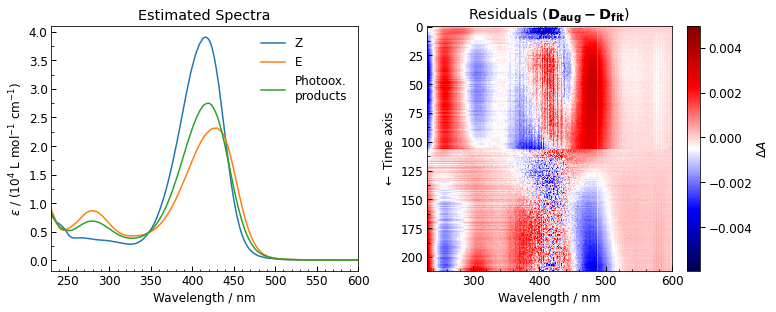

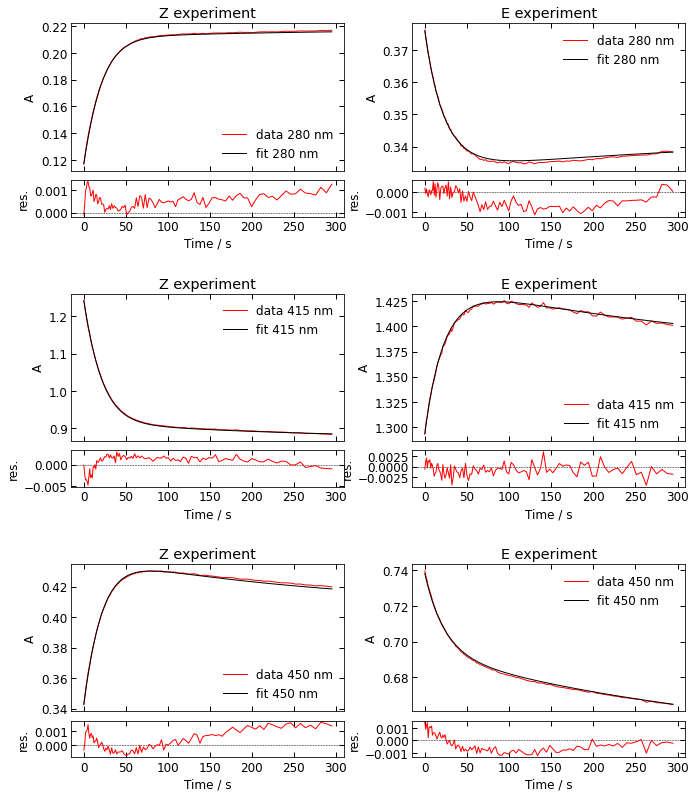

In [12]:
# fit first pair of 385 nm data with not additional constraints
_ = fit_pair(Z_exps[0], E_exps[0], lambda *args: residuals(*args, non_neg=False, known_spectrum=False), irr_LED='385 nm',
                                 Phi_ox_value=0.0015, Phi_ox_vary=True)

## Dependence of Photoox. Quantum Yield on the Spectrum of Photooxidation Products
Next, we show the dependence of $\Phi_{ox}$ on the spectrum of photooxidation products. We sampled the $\Phi_{ox}$ in the range of $0.001$ to $0.1$ and keep the value fixed while we reoptimized all the parameters. Then we plotted the sum of squares of residuals $\vert\vert \mathbf{R(\Theta)} \vert\vert_2^2$ along with the sampled quantum yields $\Phi_{ox}$. The spectra of photooxidation products are displayed and correlation of all fitted quantum yields. It is evident that spectra of *Z* and *E* basically do not change, but the spectra of photoproducts do because of a large correlation. Also, we can see that the sum of squares of residuals does not change much when  $\Phi_{ox}$ is changing. The $\vert\vert \mathbf{R(\Theta)} \vert\vert_2^2$ changes  more dramatically if we would perform the same procedure but for $\Phi_{ZE}$ or $\Phi_{EZ}$. This task is left as an exercise for the reader. The dependence between $\Phi_{ZE}$ or $\Phi_{EZ}$ can be observed, but in the region of small $\Phi_{ox}$ values (0.001 to 0.01) where we expect the true value (because the spectrum of photooxidation product corresponds to these values), the $\Phi_{ZE}$ or $\Phi_{EZ}$ values do not change much. These are the points in the 'dense area' of the correlation plots denoted by blue color.

In [13]:
# sample the photoox. quantum yields
Phi_ox_space = np.logspace(-3, -1, 30)

spectra = np.empty((Phi_ox_space.shape[0], N, wavelengths.shape[0]))  # tensor 30 x 3 x n_wl for storing of all fitted spectra
ssq = np.empty_like(Phi_ox_space)  # array of fittted sum of squares of residuals
Phis = np.empty((Phi_ox_space.shape[0], 3))  # matrix 30 x 3 for fitted quantum yields
Phis[:, -1] = Phi_ox_space  # last column is the sampled Phi_ox

# reoptimize for other values while fixing the photoox. quantum yields
for i, val in enumerate(Phi_ox_space):
    D_fit, ST_fit, pars, sq = fit_pair(Z_exps[0], E_exps[0], lambda *args: residuals(*args, non_neg=False, known_spectrum=False), irr_LED='385 nm', Phi_ox_value=val,
                                   Phi_ox_vary=False, verbose=False, plot_result=False)
    spectra[i] = ST_fit
    ssq[i] = sq
    Phis[i, 0] = pars['Phi_ZE'].value
    Phis[i, 1] = pars['Phi_EZ'].value

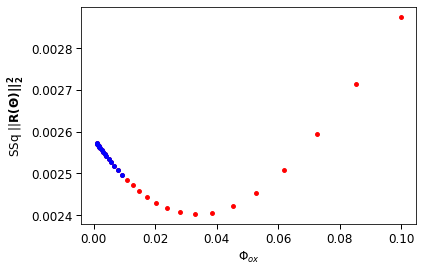

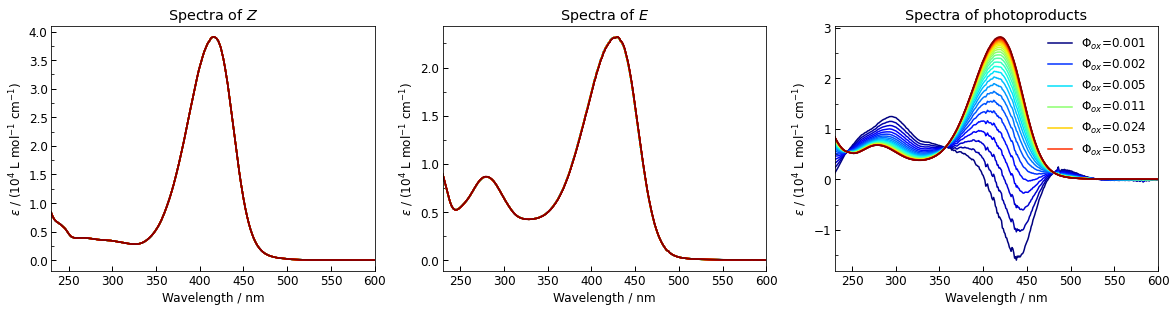

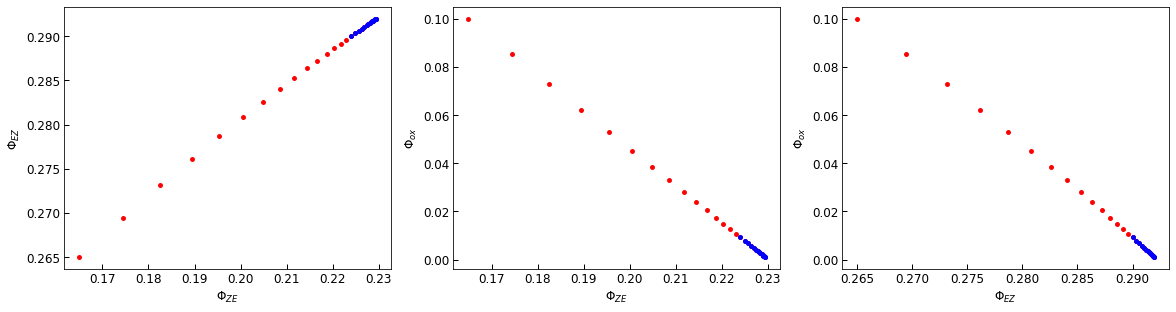

Values of Phi_ox in the blue color
[0.001      0.0011721  0.00137382 0.00161026 0.00188739 0.00221222
 0.00259294 0.0030392  0.00356225 0.00417532 0.0048939  0.00573615
 0.00672336 0.00788046 0.00923671]


In [14]:
# plot the results
plot_dependence(wavelengths, Phi_ox_space, spectra,  ssq, Phis)

## Addition of All Constraints

So now we add other constraints, the non-negativity and known spectrum constraint to find the best estimate of the spectrum of photooxidation products. We can see that the spectrum of photooxidation products is closer to the correct one. The quantum yield $\Phi_{ox}=0.0017$ is now very different from the previous non-constrained fit. As expected, isomerization quantum yields have changed only a little. Coefficients $\alpha = 0.1$ and $\beta = 0.01$ in the residual functions were chosen empirically so that all contributions in the residuals are equally balanced. The effects of non-negativity constraint itself on the sum of squares of residuals is left as an exercise for the reader.

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.6493e-02                                    1.74e-01    
       1              2         1.9112e-03      1.46e-02       1.81e+05       2.41e-02    
       2              3         1.2629e-04      1.78e-03       6.83e+04       3.03e-03    
       3              4         4.7923e-05      7.84e-05       2.19e+04       2.86e-04    
       4              5         3.7246e-05      1.07e-05       1.85e+04       1.09e-03    
       5              6         3.6933e-05      3.13e-07       3.03e+03       5.31e-07    
       6              7         3.6930e-05      3.46e-09       3.73e+02       1.49e-08    
       7              8         3.6930e-05      4.99e-12       2.53e+01       4.47e-10    
       8              9         3.6930e-05      2.22e-14       1.46e+00       8.06e-11    
`gtol` termination condition is satisfied.
Function evaluations 9, initial cost 1.6493e-02

name,value,standard error,relative error,initial value,min,max,vary
t_11,-266769.653,0.00000000,(0.00%),-266769.6533406789,-inf,inf,False
t_12,47976.2641,0.00000000,(0.00%),47976.26414351086,-inf,inf,False
t_13,-894.638147,0.00000000,(0.00%),-894.6381470716107,-inf,inf,False
t_14,-643.369587,0.00000000,(0.00%),-643.3695866071415,-inf,inf,False
t_15,-122.372950,0.00000000,(0.00%),-122.37294957268557,-inf,inf,False
t_21,-183816.049,22.7529839,(0.01%),-319922.1551308302,-inf,inf,True
t_22,-33608.8829,21.8837785,(0.07%),-23563.173231891345,-inf,inf,True
t_23,-1124.52938,16.4009006,(1.46%),-2414.8795022333384,-inf,inf,True
t_24,496.907719,11.6420978,(2.34%),265.7407553624043,-inf,inf,True
t_25,-345.871508,12.1141605,(3.50%),-89.64374903476971,-inf,inf,True


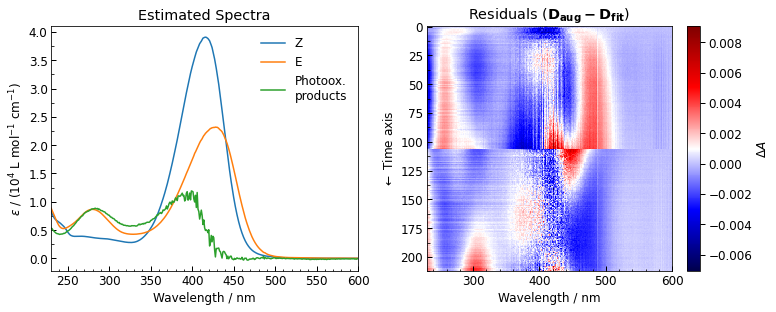

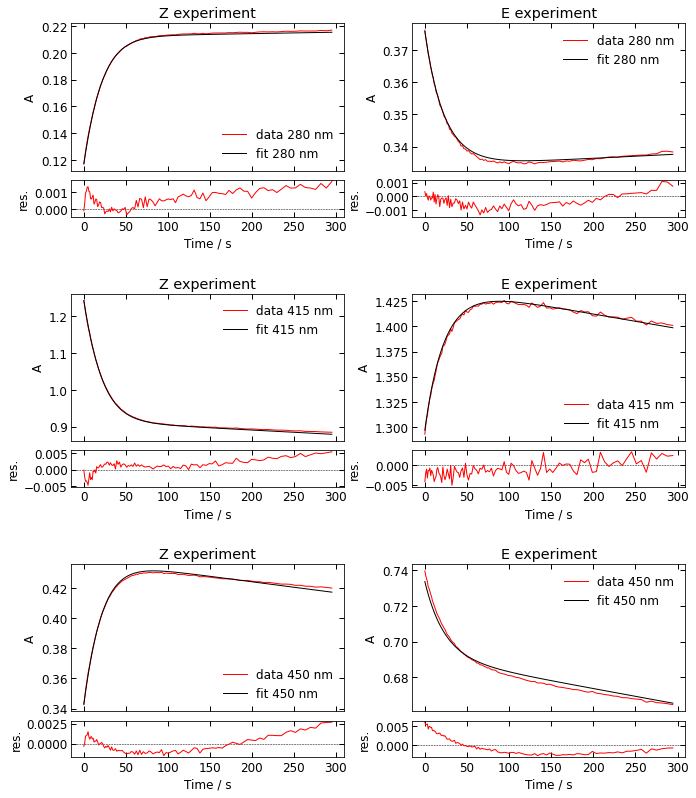

In [15]:
# fit first pair of 385 nm data with all constraints
_ = fit_pair(Z_exps[0], E_exps[0], lambda *args: residuals(*args, non_neg=True, known_spectrum=True), irr_LED='385 nm',
                                 Phi_ox_value=0.0015, Phi_ox_vary=True)

## Global Fit of All Combinations

In the following cell, we performed the fit for all combinations for all LEDs used. We saved all the fitted spectra and quantum yields for further statistical analyses. As was mentioned in the introduction, the spectra of all species are averaged from all experiment combinations and standard deviation is calculated. The line is fitted for $\log \Phi_{ZE}$ and $\log \Phi_{EZ}$ as $y$ values and $\tilde\nu = \frac{10^3}{\lambda}$ as $x$ values. The fits are then plotted in the logarithmic plot for $y$ axis. The classical standard deviation is calculated for quantum yields for individual LED light sources and for spectra from all experiments. The standard deviations are then plotted as bars in the quantum yield plots and as the corresponding areas in the case of molar absorption coefficients. The boundaries denote one standard deviation.

In [16]:
d_result = {}  # dictionary for storing the results

for led in LEDs_texts:
    # which to different directory naming for 420 nm experiments
    _Z_exps = Z_exps_420 if led == '420 nm' else Z_exps
    _E_exps = E_exps_420 if led == '420 nm' else E_exps
    
    dataset_dict = dict(D_fit=[], ST_fit=[], parameters=[])
    
    for Z_exp in _Z_exps:
        for E_exp in _E_exps:
            print(f'Fitting experiments at {led}: ({Z_exp}, {E_exp}) pair')
            D_fit, ST_fit, parameters, _ = fit_pair(Z_exp, E_exp, lambda *args: residuals(*args, non_neg=True, known_spectrum=True),
                                                 irr_LED=led, plot_result=False, verbose=False)
            
            dataset_dict['D_fit'].append(D_fit)
            dataset_dict['ST_fit'].append(ST_fit)
            dataset_dict['parameters'].append(parameters)
    d_result[led] = dataset_dict


Fitting experiments at 385 nm: (2Z high conc 01, 2E high conc 01) pair
Fitting experiments at 385 nm: (2Z high conc 01, 2E high conc 02) pair
Fitting experiments at 385 nm: (2Z high conc 01, 2E low conc 01) pair
Fitting experiments at 385 nm: (2Z high conc 01, 2E low conc 02) pair
Fitting experiments at 385 nm: (2Z high conc 02, 2E high conc 01) pair
Fitting experiments at 385 nm: (2Z high conc 02, 2E high conc 02) pair
Fitting experiments at 385 nm: (2Z high conc 02, 2E low conc 01) pair
Fitting experiments at 385 nm: (2Z high conc 02, 2E low conc 02) pair
Fitting experiments at 385 nm: (2Z low conc 01, 2E high conc 01) pair
Fitting experiments at 385 nm: (2Z low conc 01, 2E high conc 02) pair
Fitting experiments at 385 nm: (2Z low conc 01, 2E low conc 01) pair
Fitting experiments at 385 nm: (2Z low conc 01, 2E low conc 02) pair
Fitting experiments at 385 nm: (2Z low conc 02, 2E high conc 01) pair
Fitting experiments at 385 nm: (2Z low conc 02, 2E high conc 02) pair
Fitting experiment

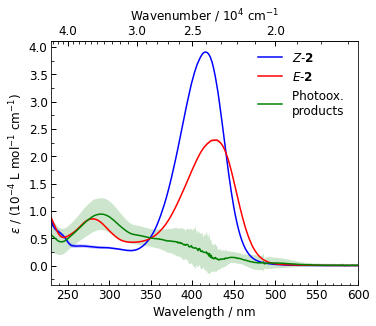

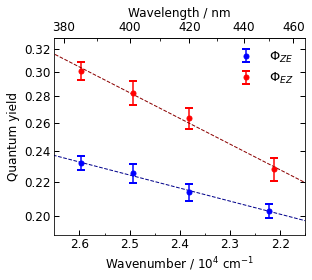

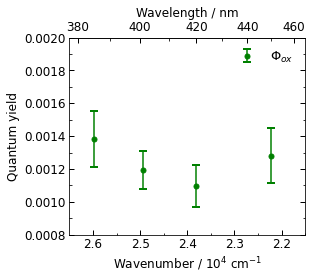

In [17]:
all_spectra = None

pdParams = pd.DataFrame()
for key, value in d_result.items():

    frame = pd.DataFrame()

    frame[f'{key}: Phi_ZE'] = [pars['Phi_ZE'].value for pars in d_result[key]['parameters']]
    frame[f'{key}: Phi_EZ'] = [pars['Phi_EZ'].value for pars in d_result[key]['parameters']]
    frame[f'{key}: Phi_ox'] = [pars['Phi_ox'].value for pars in d_result[key]['parameters']]

    pdParams = pd.concat([pdParams, frame], ignore_index=False, axis=1)

    _spectra = np.asarray(d_result[key]['ST_fit'])
    all_spectra = _spectra if all_spectra is None else np.concatenate((all_spectra, _spectra), axis=0)

# reorder columns
cols = pdParams.columns.tolist()
r_cols = []
for i in range(N):
    r_cols += cols[i::N]

pdParams = pdParams[r_cols]
pdParams.columns = pd.MultiIndex.from_product([['$\\Phi_{ZE}$', '$\\Phi_{EZ}$', '$\\Phi_{ox}$'],['385 nm', '400 nm', '420 nm', '453 nm']])
pd_styled = pdParams.style.set_table_styles([
    {'selector': 'th.col_heading', 'props': 'text-align: center;'},
    {'selector': 'th.col_heading.level0', 'props': 'font-size: 1.5em;'},
], overwrite=False)


# show the all quantum yields determined from all combinations
with pd.option_context('precision', 5):        
    display(pd_styled)

# average and calculate std of spectra
f = 1e4
ST_avrg = all_spectra.mean(axis=0) / f
ST_std = all_spectra.std(axis=0) / f

Z_avrg, E_avrg, Ph_avrg = list(ST_avrg)
Z_std, E_std, Ph_std = list(ST_std)

# plot spectra
fig, ax1 = plt.subplots(1, 1, figsize=(X_SIZE * 1.1, Y_SIZE))

set_main_axis(ax1, y_label=eps_label(f), xlim=(230, 600),
              x_minor_locator=AutoMinorLocator(5), y_minor_locator=AutoMinorLocator(2))
_ = setup_wavenumber_axis(ax1, x_major_locator=FixedLocator([1.5, 2, 2.5, 3, 4]))


ax1.plot(wavelengths, Z_avrg, 'b', lw=1.5, label='$Z$-$\\mathbf{2}$')
ax1.plot(wavelengths, E_avrg, 'r', lw=1.5, label='$E$-$\\mathbf{2}$')
ax1.plot(wavelengths, Ph_avrg, 'g', lw=1.5, label='Photoox. \nproducts')

alpha = 0.2
ax1.fill_between(wavelengths, Ph_avrg - Ph_std, Ph_avrg + Ph_std, color='g', alpha=alpha, edgecolor='none')
ax1.fill_between(wavelengths, E_avrg - E_std, E_avrg + E_std, color='r', alpha=alpha, edgecolor='none')
ax1.fill_between(wavelengths, Z_avrg - Z_std, Z_avrg + Z_std, color='b', alpha=alpha, edgecolor='none')
ax1.legend(frameon=False)
# plt.grid(which='both', alpha=0.2)
# plt.savefig('spectra_fit_QYs.png', dpi=500, transparent=False, bbox_inches='tight')
plt.show()

# calculate mean and std of fitted QYs
np_df = pdParams.to_numpy()
QYs_mean = np.nanmean(np_df, axis=0)
QYs_std = np.nanstd(np_df, axis=0)

# maximum of overlap between absorption spectrum and LEDs emission spectrum
Z_QY_wls = wavelengths[(Z_avrg * _leds.T).argmax(axis=-1)]
E_QY_wls = wavelengths[(E_avrg * _leds.T).argmax(axis=-1)]

def fit_line(xvals: np.ndarray, yvals: np.ndarray) -> tuple:
    """
    Performs the linear regression by least squares to given points. Handles the nan value present in the ydata.
    
    Parameters
    ----------
    xvals : np.ndarray
        X values as  vector.
    yvals : np.ndarray
        Y values. Can be matrix. Then all points will be used in regression. In this case, the length in the
        2nd dimension must be the same as the length of xvals.

    Returns
    -------
    slope : float
    intercept : float
    """
    log_Phi = yvals.flatten() # fit the line from all combinations
    # remove nan values
    chosen = ~np.isnan(log_Phi)
    log_Phi = log_Phi[chosen]
    x_vals = np.tile(xvals, yvals.shape[0])
    x_vals = x_vals[chosen]

    slope, intercept, *_ = linregress(x_vals, log_Phi)
    return slope, intercept

# fit line of log QY = slope * wavenumber + intercept
slope_ZE, intercept_ZE = fit_line(1e3 / Z_QY_wls, np.log10(np_df[:, :4]))
slope_EZ, intercept_EZ = fit_line(1e3 / E_QY_wls, np.log10(np_df[:, 4:8]))
x_line = np.linspace(2, 3, 10)

# construct fitted lines, convert from log QY to QY
fit_line_ZE = 10 ** (slope_ZE * x_line + intercept_ZE)
fit_line_EZ = 10 ** (slope_EZ * x_line + intercept_EZ)

def plot_QYs(only_QYd=False, filepath=None, ylim=(0.19, 0.33)):
    """
    Plots the QYs.
    """
    fig, ax1 = plt.subplots(1, 1, figsize=(X_SIZE * 0.9,   Y_SIZE*0.9))
    set_main_axis(ax1, ylim=ylim, xlim=(2.65, 2.15), y_label='Quantum yield',
                      x_label='Wavenumber / $10^{4}$ cm$^{-1}$', 
                      y_minor_locator=AutoMinorLocator(2), x_minor_locator=None)

    _ = setup_wavenumber_axis(ax1, x_label='Wavelength / nm', x_minor_locator=AutoMinorLocator(2))

    if not only_QYd:
        ax1.errorbar(1e3 / Z_QY_wls, QYs_mean[:4], QYs_std[:4], fmt="o", capsize=4, capthick=2, ms=5, color='b', label='$\Phi_{ZE}$')
        ax1.errorbar(1e3 / E_QY_wls, QYs_mean[4:8], QYs_std[4:8], fmt="o", capsize=4, capthick=2, ms=5, color='r', label='$\Phi_{EZ}$')
    else:
        ax1.errorbar(1e3 / Z_QY_wls, QYs_mean[8:], QYs_std[8:], fmt="o", capsize=4, capthick=2, ms=5, color='g', label='$\Phi_{ox}$')
    
    ax1.plot(x_line, fit_line_ZE, ls='--', color='darkblue', lw=1)
    ax1.plot(x_line, fit_line_EZ, ls='--', color='darkred', lw=1)
    
    if not only_QYd:
        ax1.set_yscale('log')
        ax1.yaxis.set_major_locator(MultipleLocator(0.02))
    else:
        ax1.yaxis.set_major_locator(MultipleLocator(2e-4))
        
    ax1.xaxis.set_minor_locator(AutoMinorLocator(2))

    ax1.yaxis.set_major_formatter(ScalarFormatter())
    ax1.yaxis.set_ticks_position('both')
    
    ax1.legend(frameon=False, prop={'size': 13})
    
    plt.tight_layout()
    if filepath is not None:
        plt.savefig(filepath, dpi=500, transparent=False, bbox_inches='tight')
    plt.show()
    
plot_QYs()
plot_QYs(True, ylim=(0.8e-3, 2e-3))


Print the rounded quantum yield error that corresponds to one stardard deviation.

In [18]:
QYs_round = [get_valerr(val, std) for val, std in zip(QYs_mean, QYs_std)]

qyframe = pd.DataFrame(index=LEDs_texts)
qyframe['$\Phi_{ZE}$'] = QYs_round[:4]
qyframe['$\Phi_{EZ}$'] = QYs_round[4:8]
qyframe['$\Phi_{ox}$'] = QYs_round[8:]
qyframe.index.names = ['LED']

qyframe

,$\Phi_{ZE}$,$\Phi_{EZ}$,$\Phi_{ox}$
LED,,,
385 nm,0.232 $\pm$ 0.005,0.301 $\pm$ 0.008,0.0014 $\pm$ 0.0002
400 nm,0.226 $\pm$ 0.006,0.283 $\pm$ 0.009,0.0012 $\pm$ 0.0001
420 nm,0.214 $\pm$ 0.005,0.263 $\pm$ 0.007,0.0011 $\pm$ 0.0001
453 nm,0.203 $\pm$ 0.004,0.228 $\pm$ 0.007,0.0013 $\pm$ 0.0002


## Photostationary State (PSS)

In general, PSS is given by solving the null space problem
$$\mathbf{\Phi}\mathrm{diag}(\boldsymbol{\varepsilon})\mathbf{c} = 0$$

If we neglect photooxidation which is very inefficient, the photostationary state will be given by the spectra of both *Z* and *E* and isomerization quantum yields. Solution of this system of equations (the last row is added for normalization of isomer population so that the total population is 1) lead to the solution (wavelength-dependency of quantum yields and $\varepsilon$ was omitted for clarity):

$$\begin{pmatrix}
- \Phi_{ZE}\varepsilon_Z & \Phi_{EZ}\varepsilon_E  \\
1 & 1
\end{pmatrix}\begin{pmatrix}
c_{Z} \\
c_{E}
\end{pmatrix}=\begin{pmatrix}
0 \\
1
\end{pmatrix}$$

$$\begin{pmatrix}
c_{Z} \\
c_{E}
\end{pmatrix}=\frac{1}{\Phi_{ZE}\varepsilon_Z + \Phi_{EZ}\varepsilon_E}\begin{pmatrix}
\Phi_{EZ}\varepsilon_E \\
\Phi_{ZE}\varepsilon_Z
\end{pmatrix}$$

The region shown by full lines is the region where the quantum yields were determined (~375 to 460 nm). The dashed lines represent extrapolation of the fitted quantum yields. We can see that at ~400 nm, the population of *E* is the highest, ca. 60%, which agrees with the experiment.

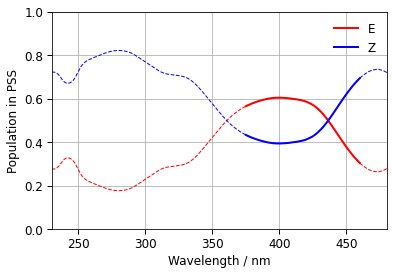

In [19]:
idx1, idx2 = fi(wavelengths, [375, 460])

wls_cut = wavelengths[idx1:idx2+1]

# fit lines of quantum yield sampled in wavelengths
qys_ZE = 10 ** (slope_ZE * 1e3 / wavelengths + intercept_ZE)
qys_EZ = 10 ** (slope_EZ * 1e3 / wavelengths + intercept_EZ)

PSS_E = qys_ZE * ST_avrg[0] / (qys_ZE * ST_avrg[0] + qys_EZ * ST_avrg[1])
PSS_E_cut = PSS_E[idx1:idx2+1]

plt.plot(wavelengths, PSS_E, ls='--', lw=1, c='r')
plt.plot(wavelengths, 1 - PSS_E, ls='--', lw=1, c='b')

plt.plot(wls_cut, PSS_E_cut, label='E', lw=2, c='r')
plt.plot(wls_cut, 1 - PSS_E_cut, label='Z', lw=2, c='b')

plt.ylim(0, 1)
plt.xlim(230, 480)
plt.grid()
plt.xlabel('Wavelength / nm')
plt.ylabel('Population in PSS')

plt.legend(frameon=False)

plt.show()